## Default of Credit Card Clients

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
df = pd.read_csv('./output/DA_EXC/3-times_wrong_samples.csv',index_col=0)

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT_4,BILL_AMT_5,BILL_AMT_6,PAY_AMT_1,PAY_AMT_2,PAY_AMT_3,PAY_AMT_4,PAY_AMT_5,PAY_AMT_6,default
27688,27689,50000,2,2,2,25,0,0,0,0,...,37264,17486,18348,2500,3000,2000,1000,1000,1000,1
23526,23527,100000,2,1,1,49,1,2,0,0,...,95952,98744,97896,0,4700,4400,6000,2000,4000,1
13287,13288,110000,2,2,1,32,1,2,0,0,...,76265,77860,79251,0,3313,2879,2976,2839,2935,1
29808,29809,250000,1,1,1,34,0,0,0,0,...,7277,4972,2609,1131,4000,3000,99,1000,6000,1
5977,5978,100000,2,3,2,28,2,0,0,0,...,60824,60969,59650,3796,3041,2500,2600,2171,2600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15250,15251,30000,2,2,1,45,2,0,0,0,...,13511,13781,14070,1665,1676,1223,493,511,514,0
16016,16017,140000,2,3,1,47,6,5,4,3,...,139701,90756,92935,0,0,0,0,3000,2000,0
6539,6540,80000,2,1,2,28,0,0,2,2,...,80584,81693,78470,6800,0,6000,3000,0,5100,1
2500,2501,330000,1,1,1,34,0,0,0,0,...,128257,116988,105961,7015,7000,10007,6500,6600,9000,1


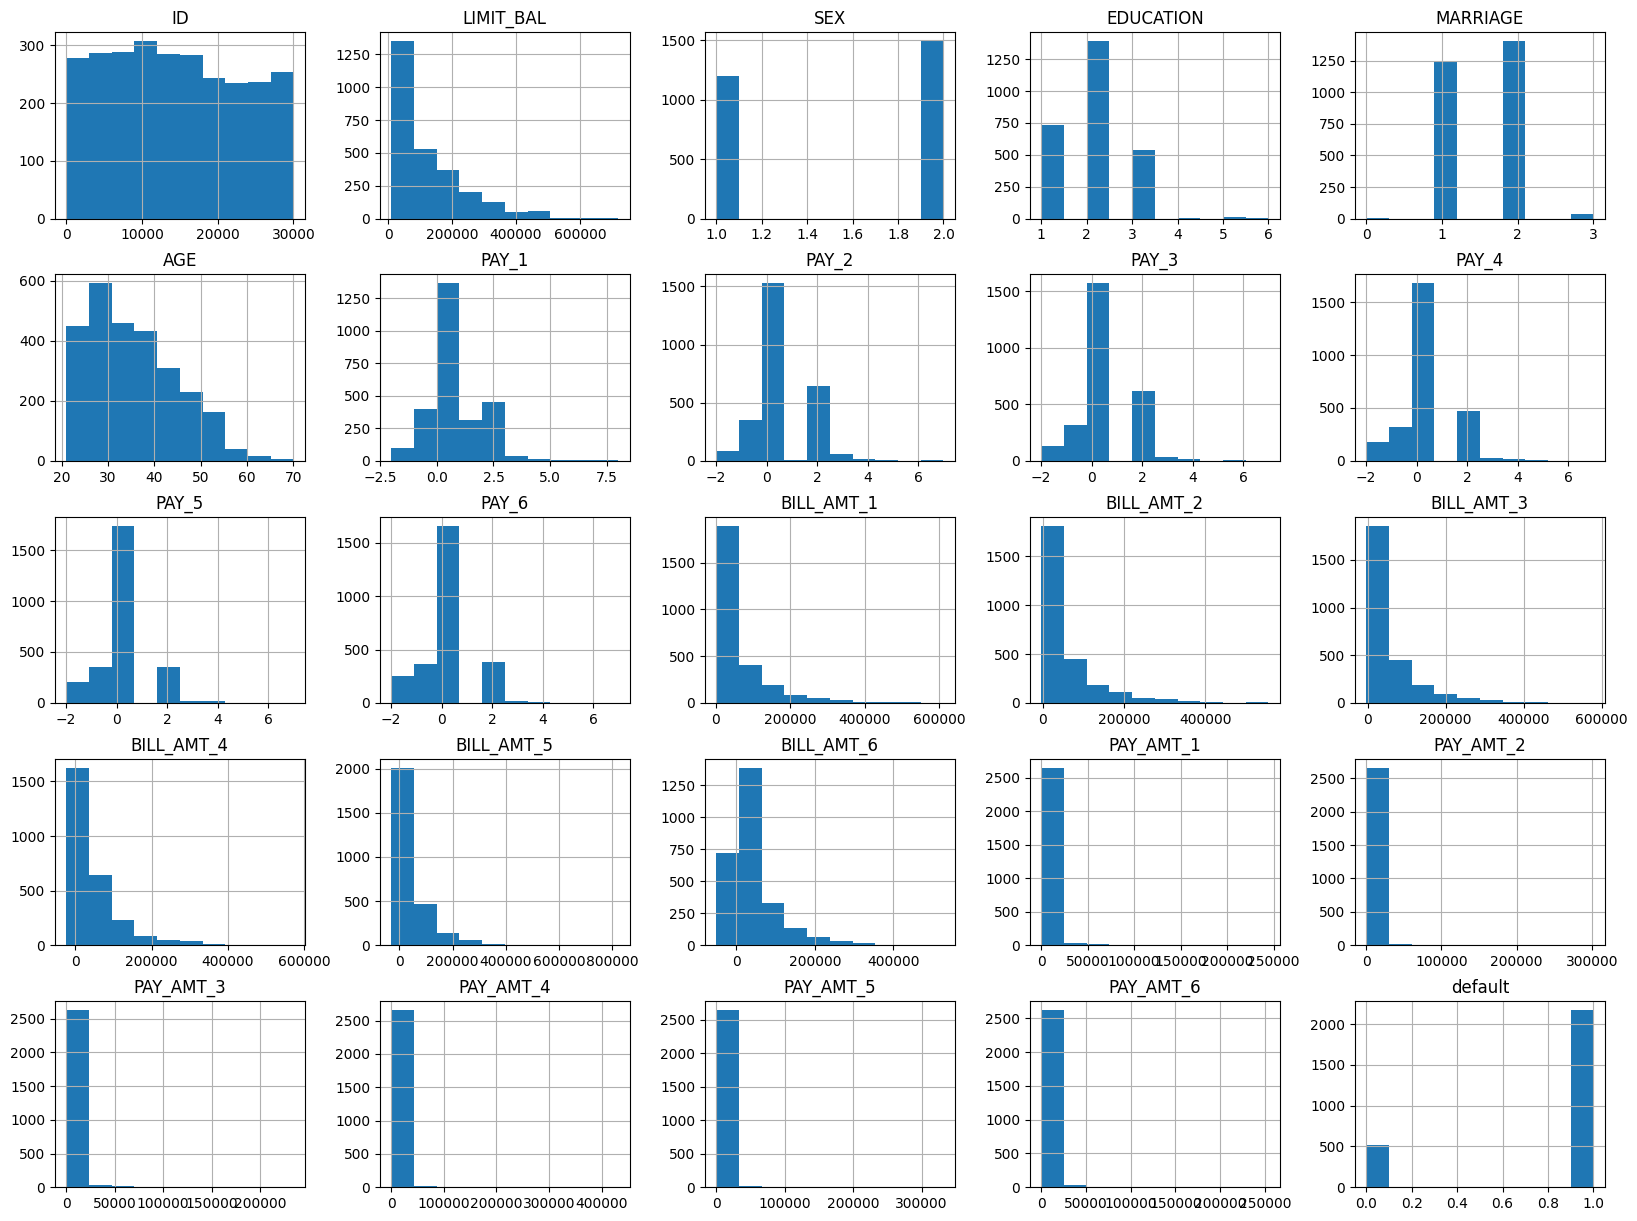

In [4]:
import matplotlib.pyplot as plt
df.hist(figsize= (20,15))
plt.show()

In [15]:
from mods_defaults import BasicTransformer
my_base_transformer = BasicTransformer('')

In [16]:
df_t = my_base_transformer.transform(df)

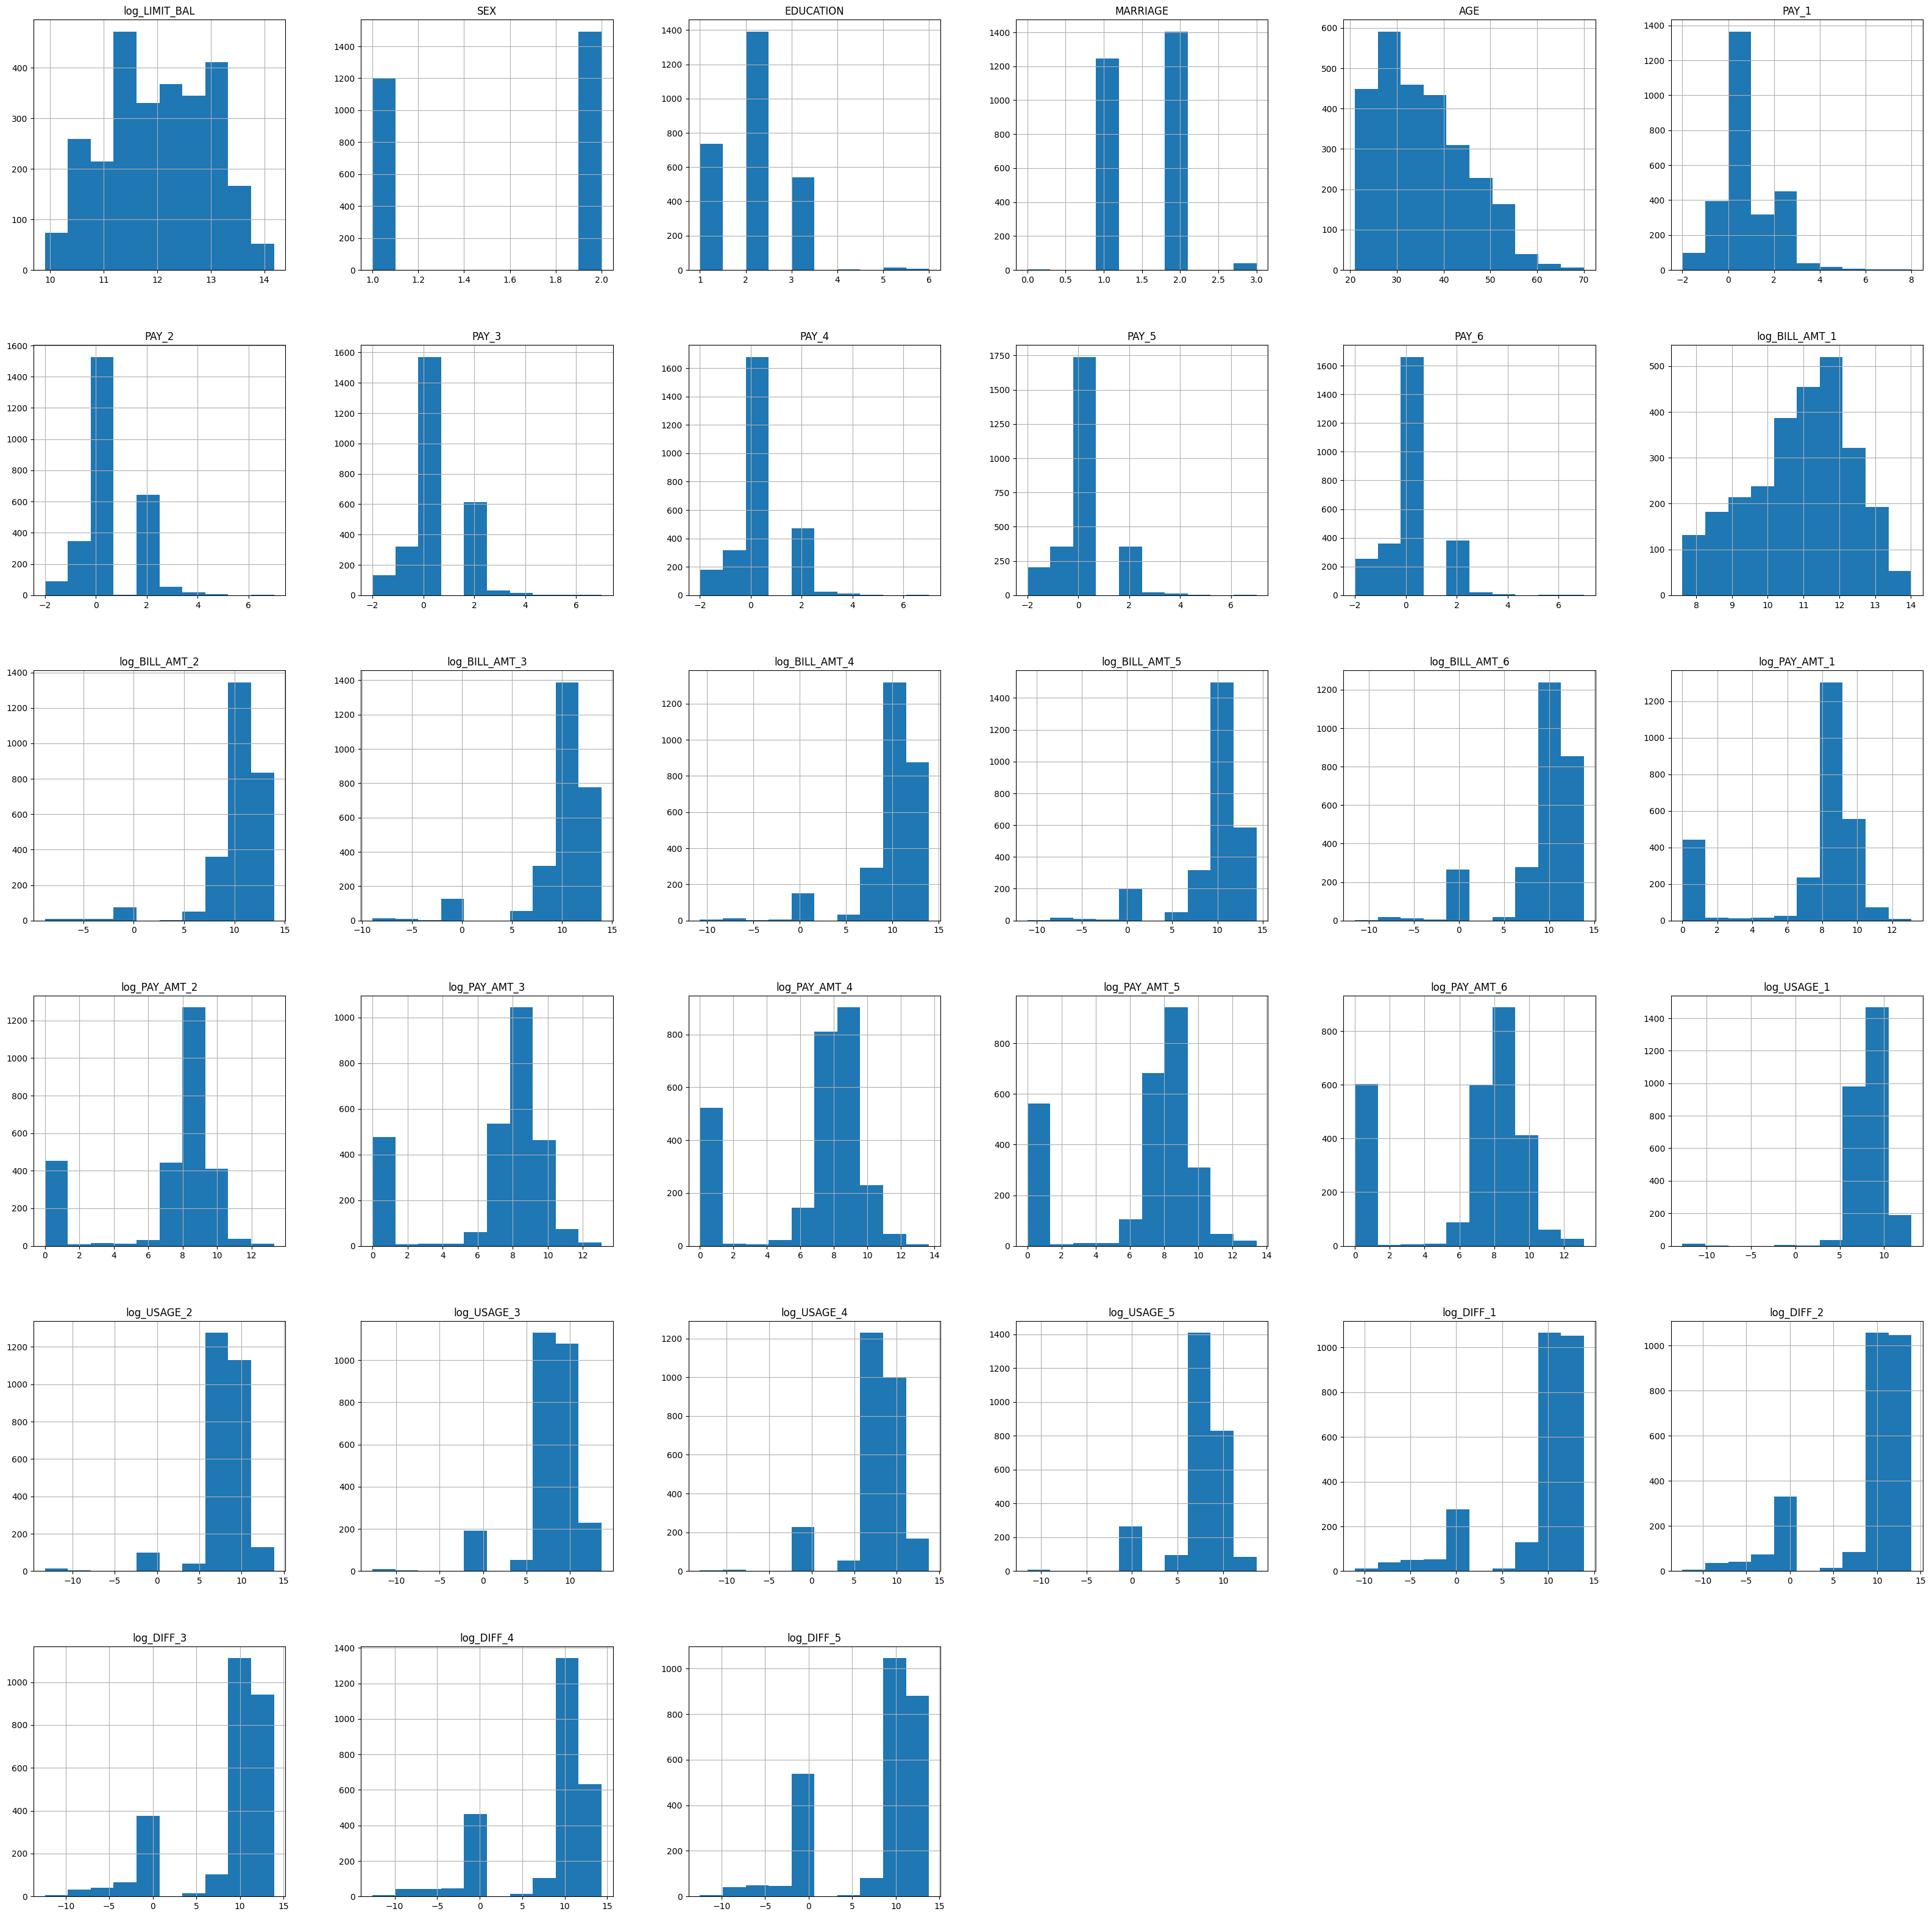

In [8]:
df.hist(figsize=(40,40))
plt.show()
plt.close()

In [12]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT_4,BILL_AMT_5,BILL_AMT_6,PAY_AMT_1,PAY_AMT_2,PAY_AMT_3,PAY_AMT_4,PAY_AMT_5,PAY_AMT_6,default
count,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,...,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000
mean,14403.016710,126674.222057,1.554029,1.958782,1.548459,35.311177,0.338284,0.395470,0.316747,0.158931,...,50265.862235,46043.490160,44344.575566,4363.415150,4134.320832,4104.256220,4028.784255,4255.596732,4361.306350,0.806907
std,8526.567943,113017.649496,0.497165,0.757436,0.529559,9.469377,1.195090,1.221377,1.198193,1.139585,...,68769.627927,64887.874221,62268.041493,10815.713895,11137.291477,12025.058283,14425.412421,14690.851320,15448.638076,0.394799
min,2.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-24303.000000,-30481.000000,-51443.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7194.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,8547.000000,6810.000000,5251.000000,1150.000000,1055.000000,570.000000,391.000000,390.000000,289.000000,1.000000
50%,14014.000000,80000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,26011.000000,22449.000000,20750.000000,2034.000000,2000.000000,1668.000000,1449.000000,1500.000000,1466.000000,1.000000
75%,21436.000000,180000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,2.000000,0.000000,0.000000,...,60824.000000,56170.000000,54449.000000,4409.000000,4107.000000,3749.000000,3500.000000,3653.000000,3500.000000,1.000000
max,30000.000000,720000.000000,2.000000,6.000000,3.000000,70.000000,8.000000,7.000000,7.000000,7.000000,...,572805.000000,823540.000000,527711.000000,244500.000000,302000.000000,234456.000000,432130.000000,332000.000000,254000.000000,1.000000


In [14]:
df.loc[df.PAY_1==-2].transpose()

,25921,23516,18550,9247,14766,18795,24542,12536,23390,14020,...,22505,15503,13796,1843,25726,14064,23293,23842,982,26121
ID,25922,23517,18551,9248,14767,18796,24543,12537,23391,14021,...,22506,15504,13797,1844,25727,14065,23294,23843,983,26122
LIMIT_BAL,30000,180000,150000,280000,150000,80000,220000,150000,430000,500000,...,310000,210000,390000,20000,160000,200000,100000,250000,500000,380000
SEX,2,2,2,1,2,2,1,2,2,2,...,2,1,1,1,2,1,2,2,1,2
EDUCATION,2,2,1,1,1,2,1,3,1,1,...,1,3,1,1,1,1,2,2,1,1
MARRIAGE,2,1,2,1,2,1,2,1,1,1,...,1,1,1,2,2,2,2,1,2,1
AGE,39,34,24,38,29,29,33,24,37,39,...,33,47,36,41,30,38,31,52,36,36
PAY_1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
PAY_2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1
PAY_3,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,...,-2,-2,-2,0,-2,-2,-2,-2,-2,-1
PAY_4,-2,-2,-2,-2,-2,2,-2,-2,-2,-2,...,-2,-2,-2,0,-2,-2,-2,-2,-2,-1


In [1]:
from data_loader_exclude import load_data_default as load_data_exclude

In [2]:
load_data= load_data_exclude(exclude=True)

In [3]:
X = load_data.df_train

In [13]:
import pandas as pd

In [14]:
df = pd.concat(list(load_data.load_train_data()),axis=1)

In [15]:
df.loc[X.ID == 23516].transpose()

,23515
ID,23516
LIMIT_BAL,150000
SEX,2
EDUCATION,1
MARRIAGE,2
AGE,32
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0


In [4]:
X.loc[25921]

KeyError: 25921

In [17]:
df_t.loc[df.PAY_1==-2].transpose()

,25921,23516,18550,9247,14766,18795,24542,12536,23390,14020,...,22505,15503,13796,1843,25726,14064,23293,23842,982,26121
LIMIT_BAL,30000,180000,150000,280000,150000,80000,220000,150000,430000,500000,...,310000,210000,390000,20000,160000,200000,100000,250000,500000,380000
SEX,2,2,2,1,2,2,1,2,2,2,...,2,1,1,1,2,1,2,2,1,2
EDUCATION,2,2,1,1,1,2,1,3,1,1,...,1,3,1,1,1,1,2,2,1,1
MARRIAGE,2,1,2,1,2,1,2,1,1,1,...,1,1,1,2,2,2,2,1,2,1
AGE,39,34,24,38,29,29,33,24,37,39,...,33,47,36,41,30,38,31,52,36,36
PAY_1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
PAY_2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1
PAY_3,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,...,-2,-2,-2,0,-2,-2,-2,-2,-2,-1
PAY_4,-2,-2,-2,-2,-2,2,-2,-2,-2,-2,...,-2,-2,-2,0,-2,-2,-2,-2,-2,-1
PAY_5,-2,-2,-2,-2,-2,2,-2,-2,-2,-2,...,-2,-2,-1,0,-1,-2,-2,-2,-2,-1
